In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Constants
NUM_MOBILE_NODES = 50
NUM_STATIONARY_NODES = 50
AREA_SIZE = 500
DETECTION_RADIUS = 7
MAX_ITERATIONS = 200
C1 = 1.5  # cognitive learning factor
C2 = 1.5  # social learning factor
C3 = 0.5  # virtual force factor
W = 0.7  # inertia weight for velocity
MAX_VELOCITY = 2.0

# Generate random positions for sensor nodes
np.random.seed(0)  # For reproducibility
mobile_nodes = np.random.rand(NUM_MOBILE_NODES, 2) * AREA_SIZE
stationary_nodes = np.random.rand(NUM_STATIONARY_NODES, 2) * AREA_SIZE

# Initialize PSO parameters for mobile nodes
velocities = np.random.rand(NUM_MOBILE_NODES, 2) * MAX_VELOCITY
pbest_positions = np.copy(mobile_nodes)
gbest_position = mobile_nodes[np.random.choice(range(NUM_MOBILE_NODES))]

In [3]:
# Define the virtual force function
def compute_virtual_forces(mobile_nodes, stationary_nodes, detection_radius):
    forces = np.zeros_like(mobile_nodes)
    
    for i, node in enumerate(mobile_nodes):
        force = np.array([0.0, 0.0])
        
        # Repulsive force from stationary nodes
        for stationary_node in stationary_nodes:
            dist = np.linalg.norm(node - stationary_node)
            if dist < detection_radius:
                repulsive_force = (node - stationary_node) / (dist + 1e-6)
                force += repulsive_force
        
        # Attractive force between mobile nodes to maintain coverage
        for j, other_node in enumerate(mobile_nodes):
            if i != j:
                dist = np.linalg.norm(node - other_node)
                if dist > detection_radius:
                    attractive_force = (other_node - node) / (dist + 1e-6)
                    force += attractive_force

        forces[i] = force

    return forces

In [4]:
# Define the fitness function (based on area coverage)
def compute_fitness(nodes, detection_radius):
    grid_size = 1
    grid_points = np.mgrid[0:AREA_SIZE:grid_size, 0:AREA_SIZE:grid_size].reshape(2, -1).T
    covered_points = np.zeros(len(grid_points))

    for node in nodes:
        distances = np.linalg.norm(grid_points - node, axis=1)
        covered_points += distances < detection_radius

    return np.sum(covered_points > 0) / len(grid_points)

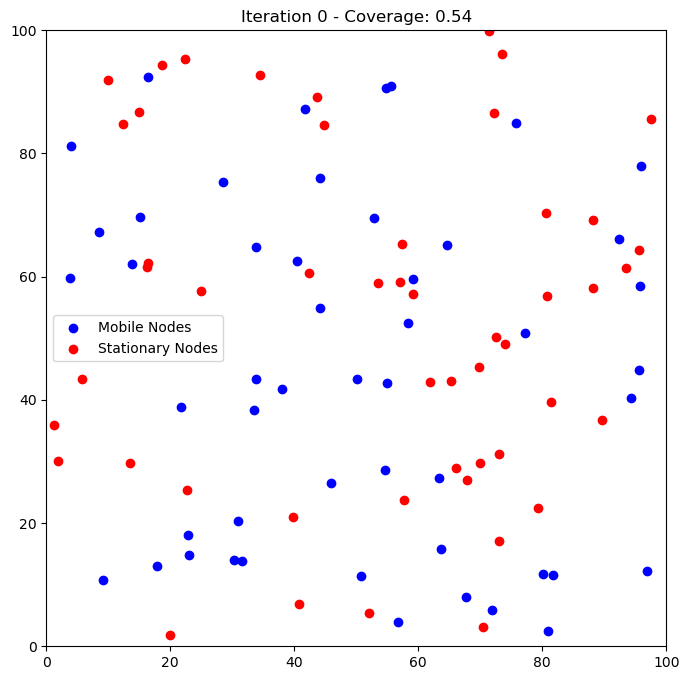

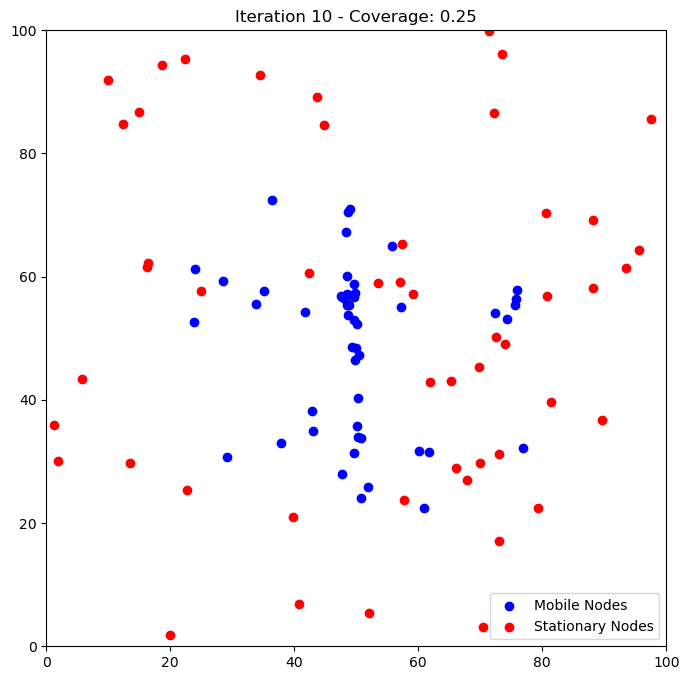

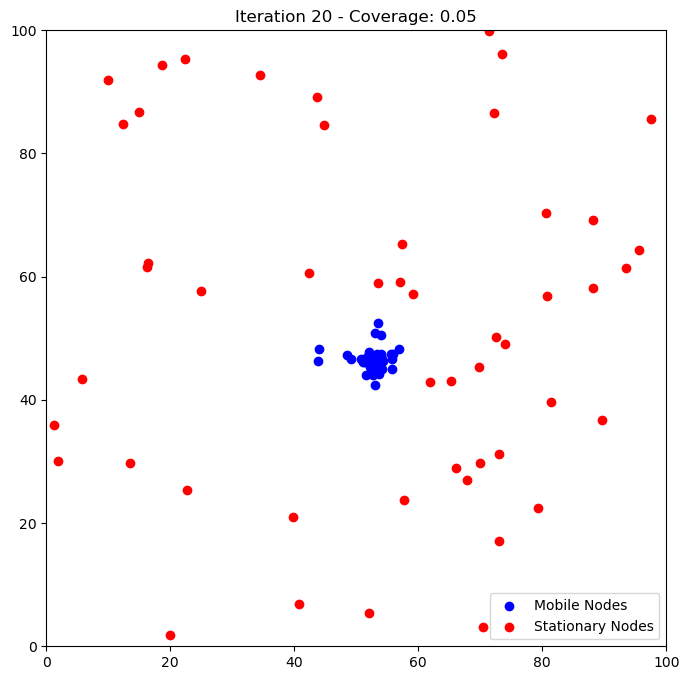

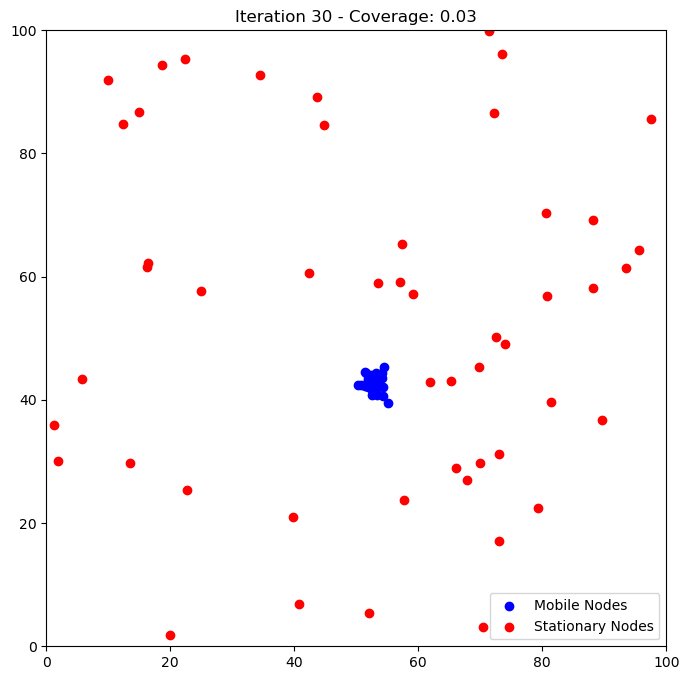

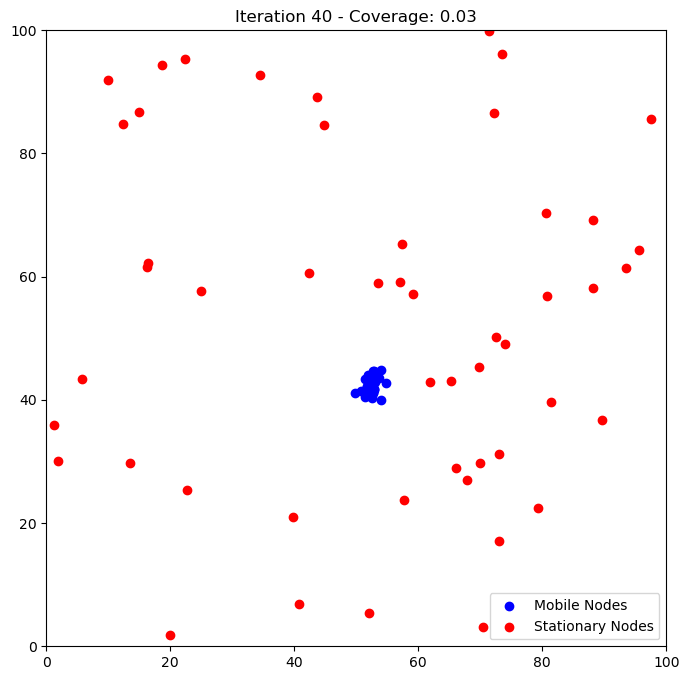

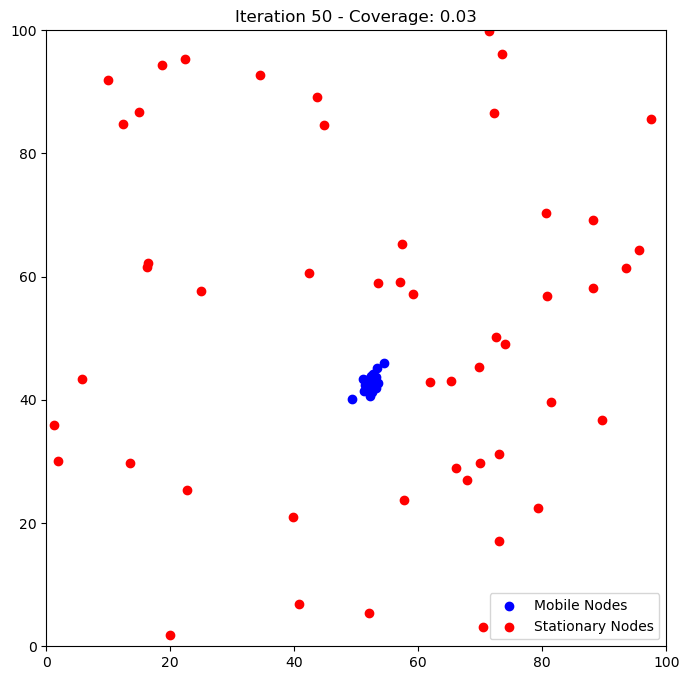

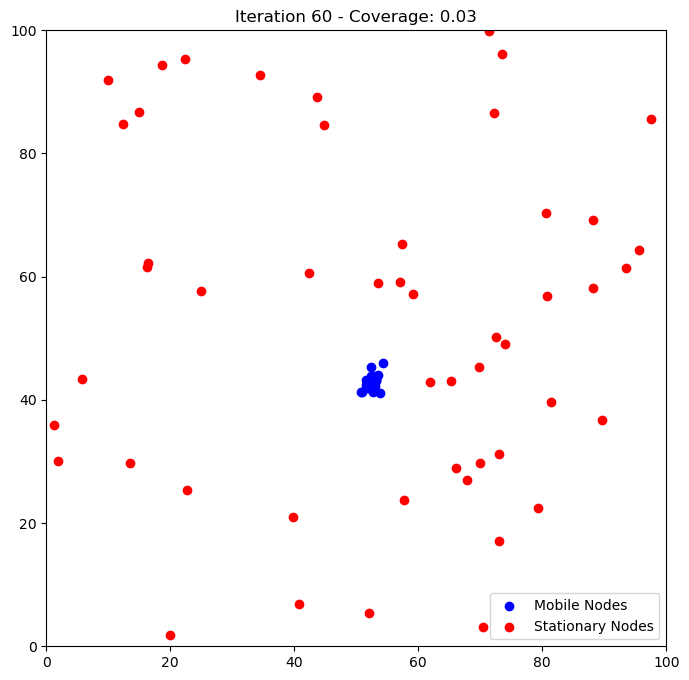

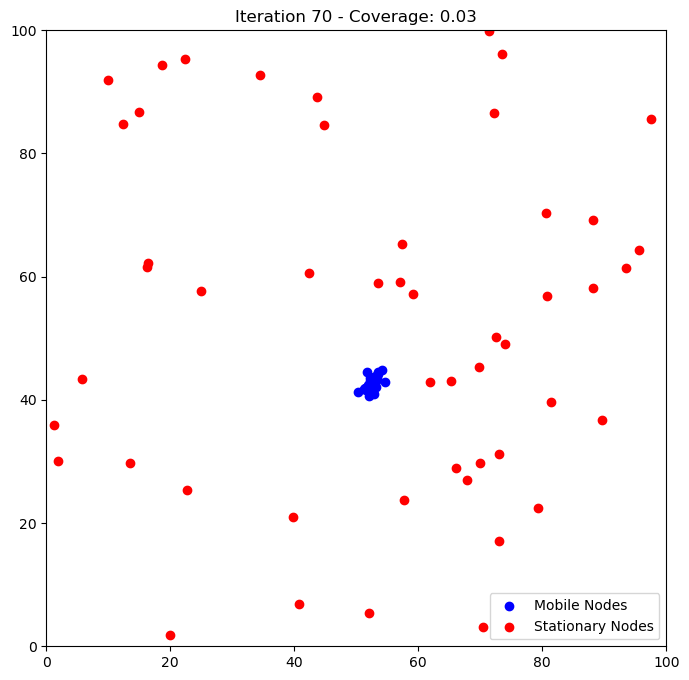

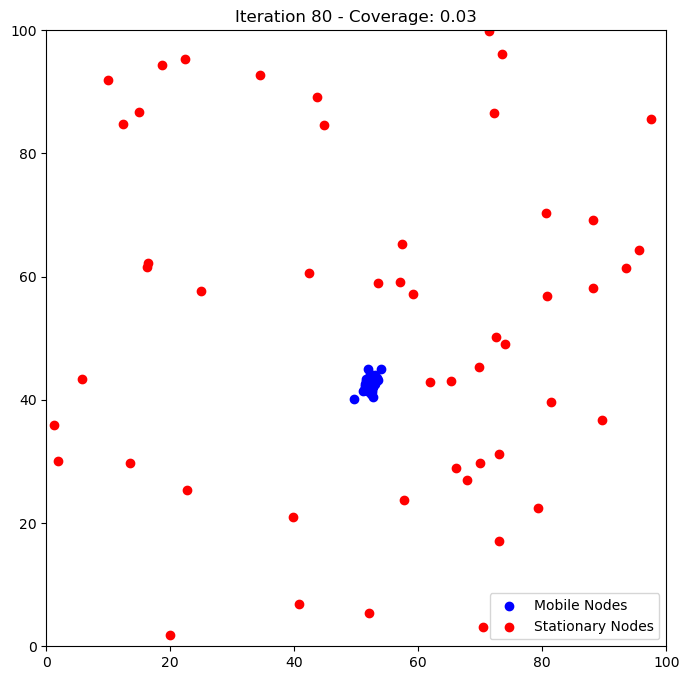

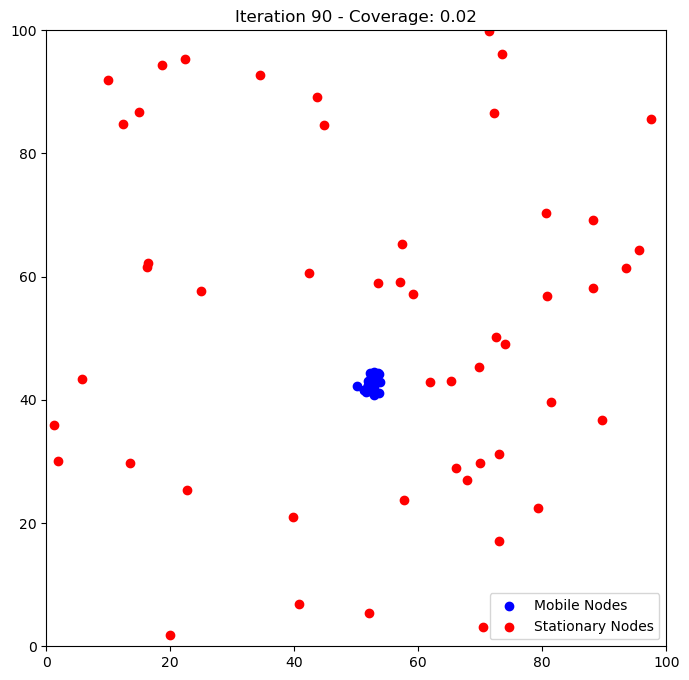

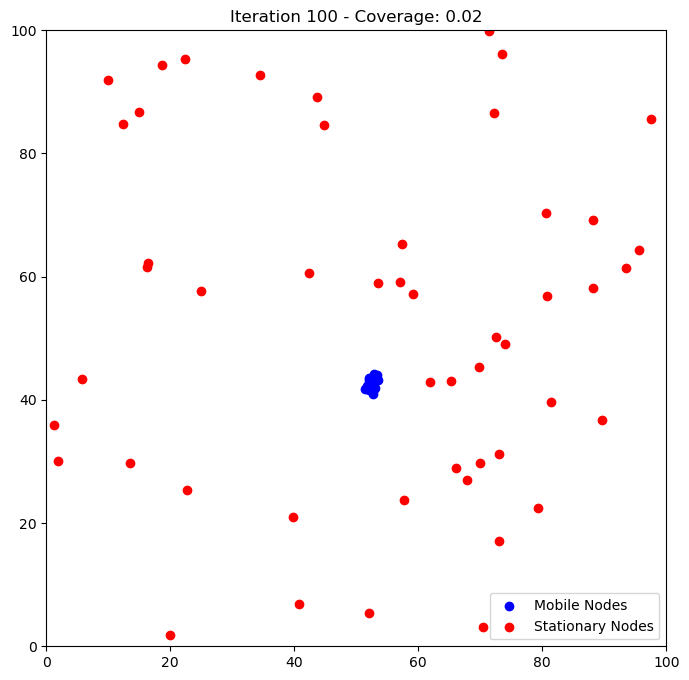

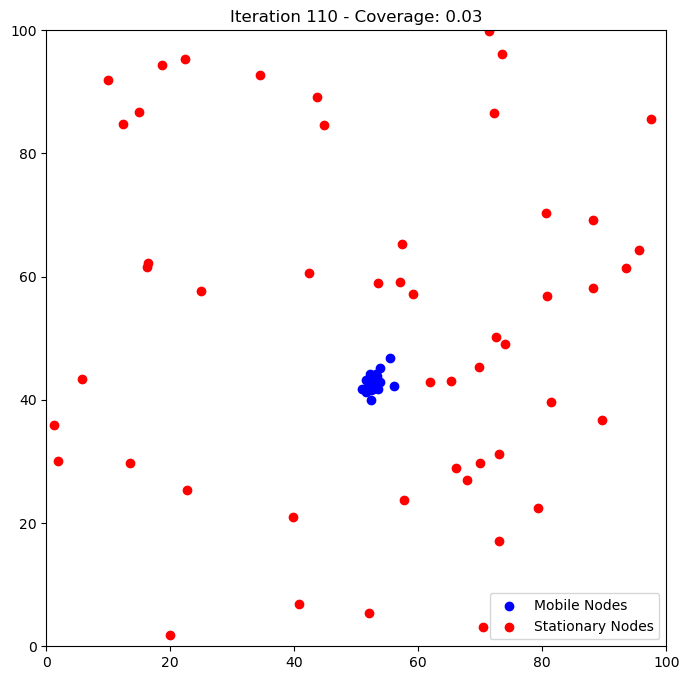

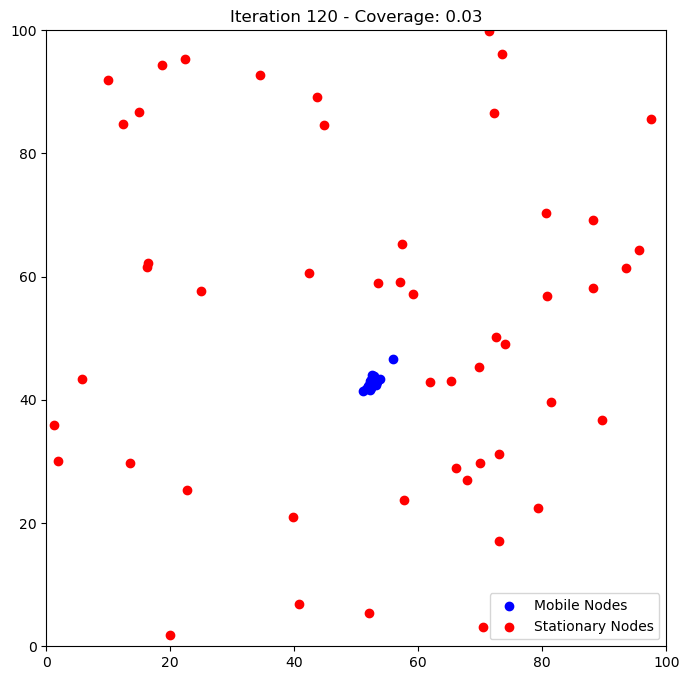

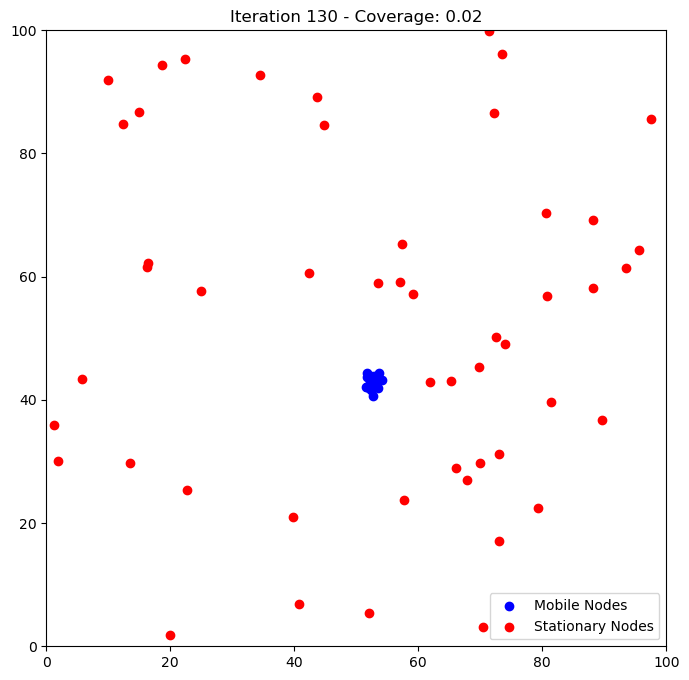

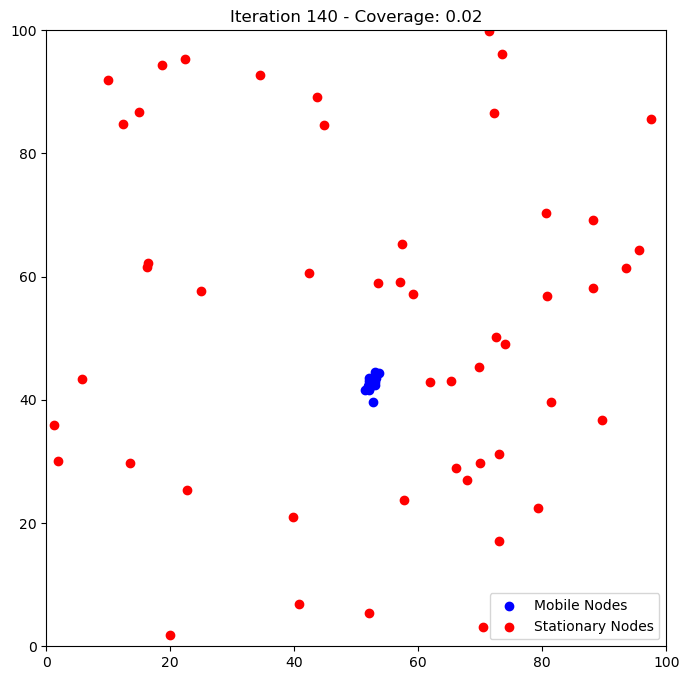

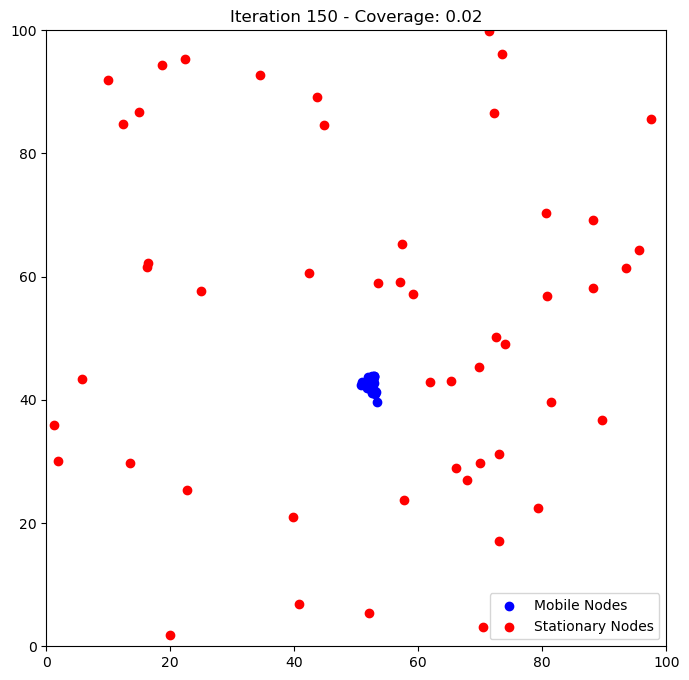

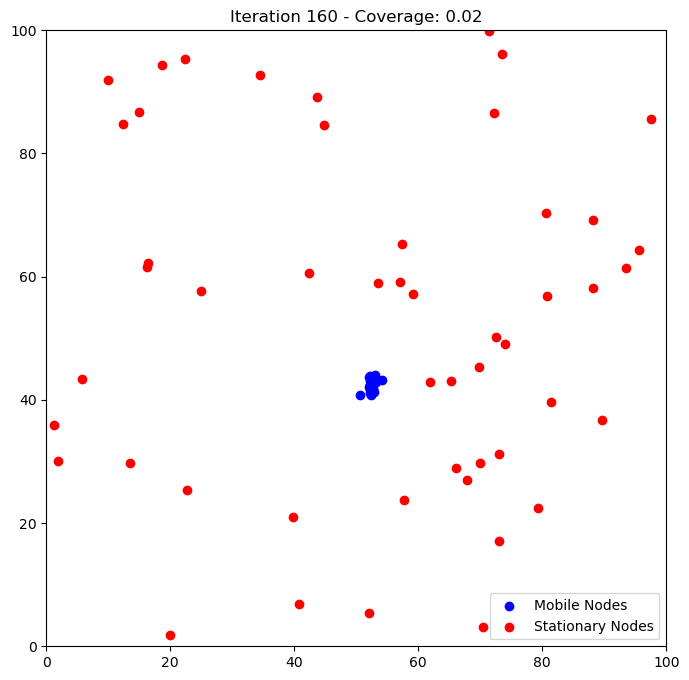

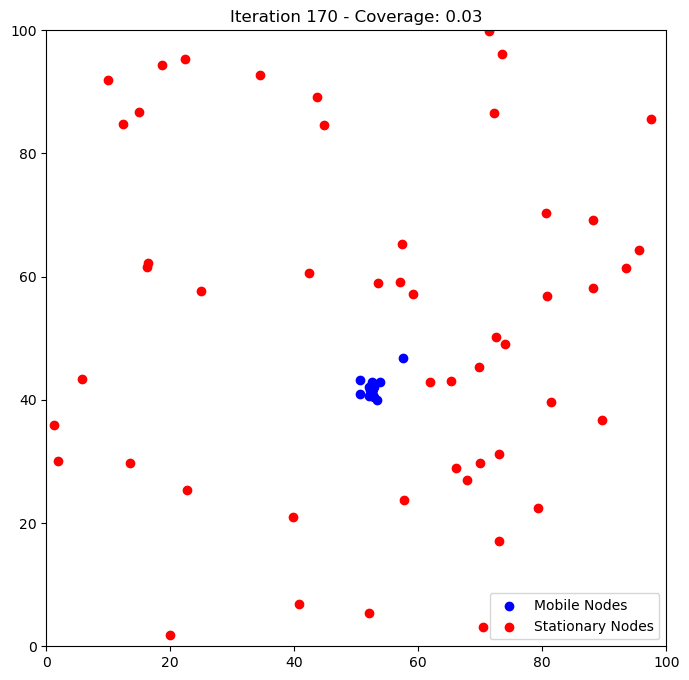

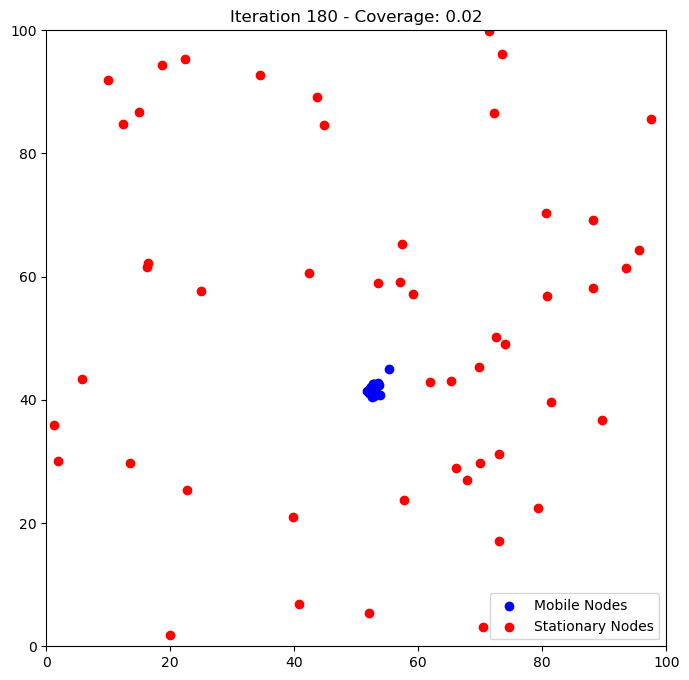

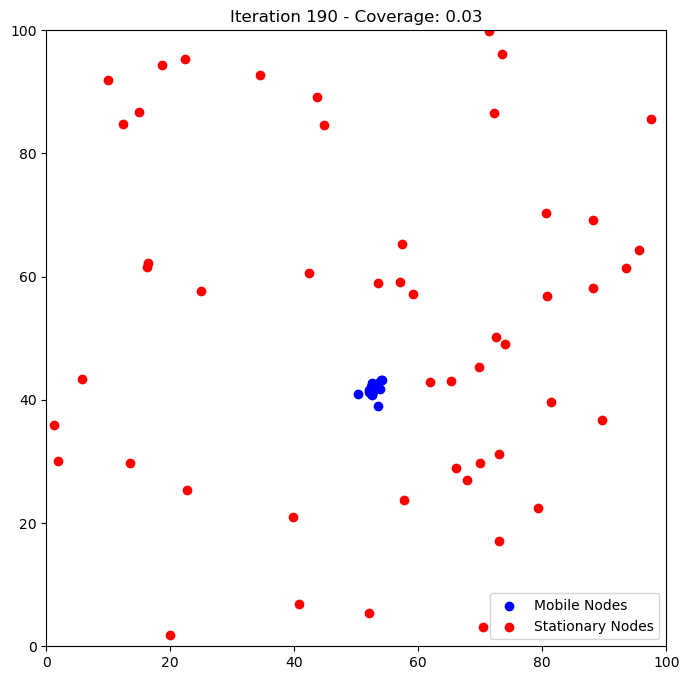

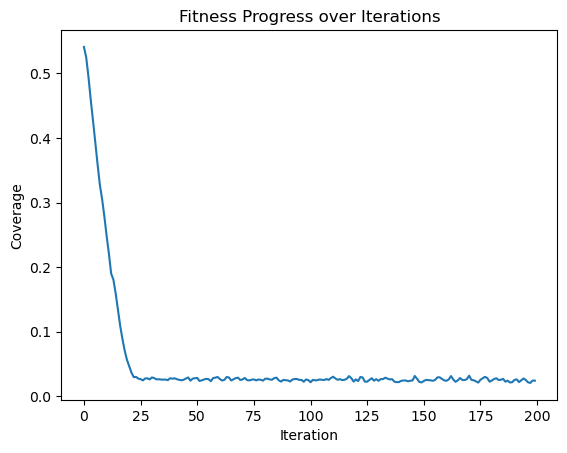

In [5]:
# Main VFPSO loop
fitness_progress = []

for iteration in range(MAX_ITERATIONS):
    # Calculate the virtual forces
    forces = compute_virtual_forces(mobile_nodes, stationary_nodes, DETECTION_RADIUS)

    # PSO velocity update with virtual forces
    for i in range(NUM_MOBILE_NODES):
        inertia = W * velocities[i]
        cognitive = C1 * np.random.rand() * (pbest_positions[i] - mobile_nodes[i])
        social = C2 * np.random.rand() * (gbest_position - mobile_nodes[i])
        force_influence = C3 * forces[i]
        
        velocities[i] = inertia + cognitive + social + force_influence

        # Limit velocity to max velocity
        velocities[i] = np.clip(velocities[i], -MAX_VELOCITY, MAX_VELOCITY)
        
        # Update positions
        mobile_nodes[i] += velocities[i]

    # Update personal best (pbest) and global best (gbest) based on fitness
    for i in range(NUM_MOBILE_NODES):
        fitness = compute_fitness(mobile_nodes, DETECTION_RADIUS)
        if fitness > compute_fitness(pbest_positions[i], DETECTION_RADIUS):
            pbest_positions[i] = np.copy(mobile_nodes[i])
    
    if fitness > compute_fitness(gbest_position, DETECTION_RADIUS):
        gbest_position = mobile_nodes[np.argmax([compute_fitness(pos, DETECTION_RADIUS) for pos in mobile_nodes])]

    # Track fitness progress
    fitness_progress.append(fitness)
    
    # Plot the positions and forces (every 10 iterations)
    if iteration % 10 == 0:
        plt.figure(figsize=(8, 8))
        plt.scatter(mobile_nodes[:, 0], mobile_nodes[:, 1], color='b', label='Mobile Nodes')
        plt.scatter(stationary_nodes[:, 0], stationary_nodes[:, 1], color='r', label='Stationary Nodes')
        plt.xlim(0, AREA_SIZE)
        plt.ylim(0, AREA_SIZE)
        plt.title(f'Iteration {iteration} - Coverage: {fitness:.2f}')
        plt.legend()
        plt.show()

# Plot fitness over iterations
plt.plot(fitness_progress)
plt.title('Fitness Progress over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Coverage')
plt.show()

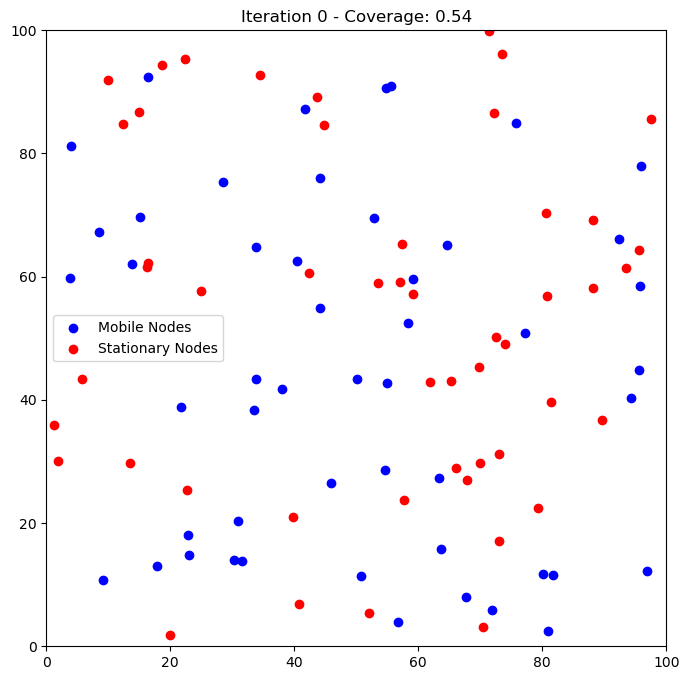

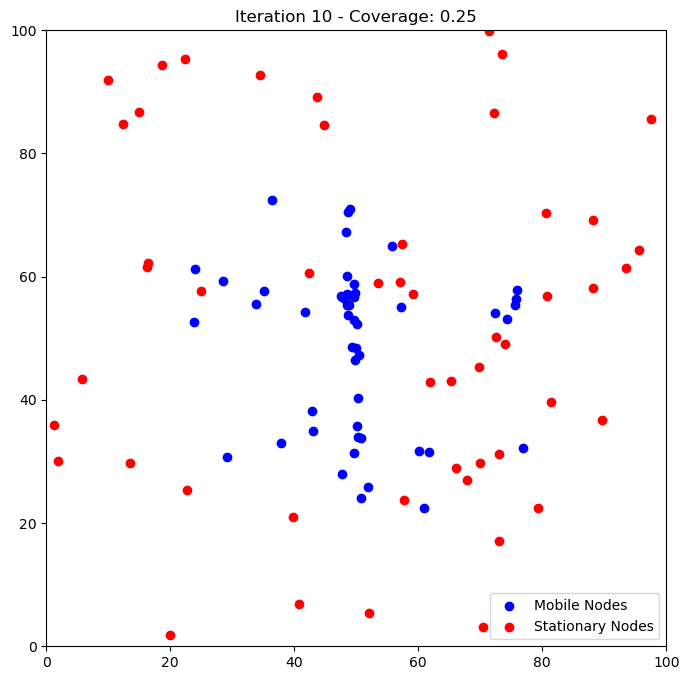

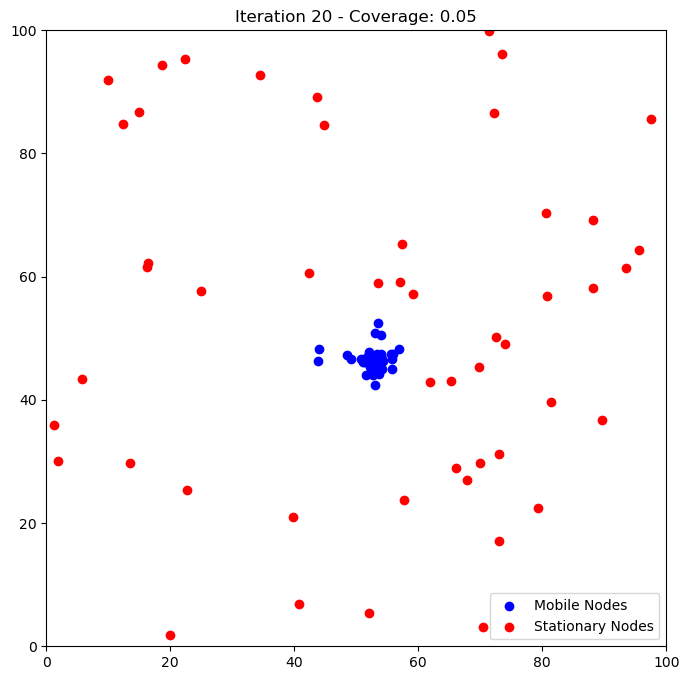

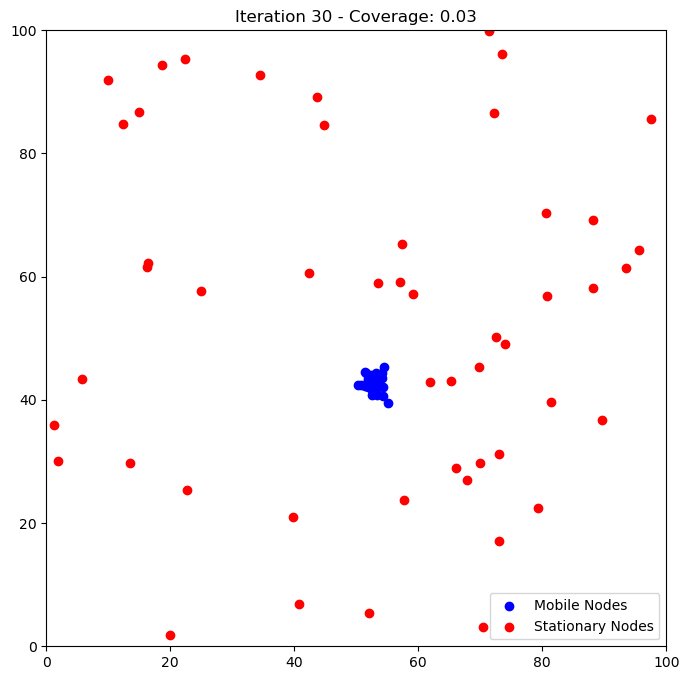

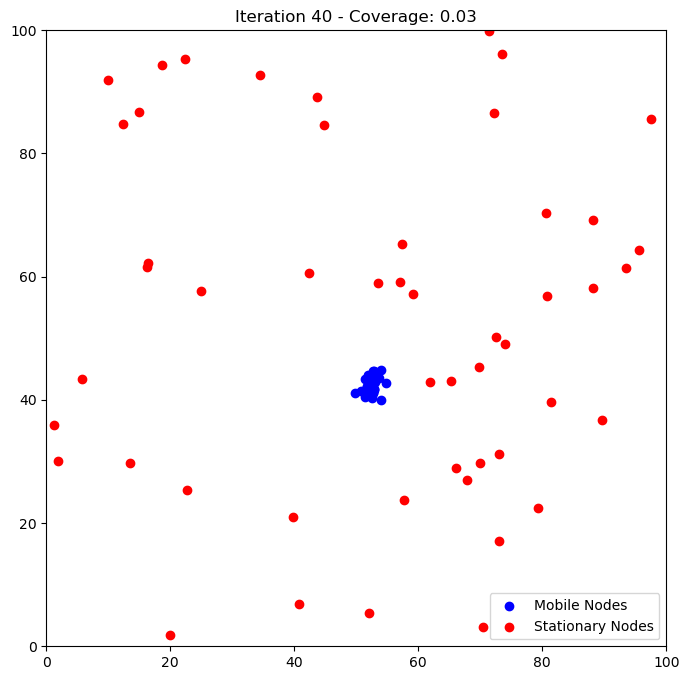

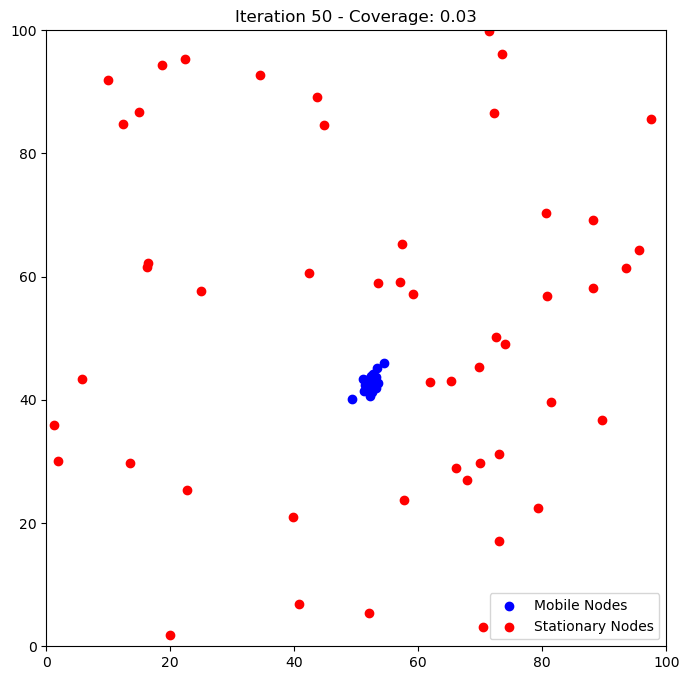

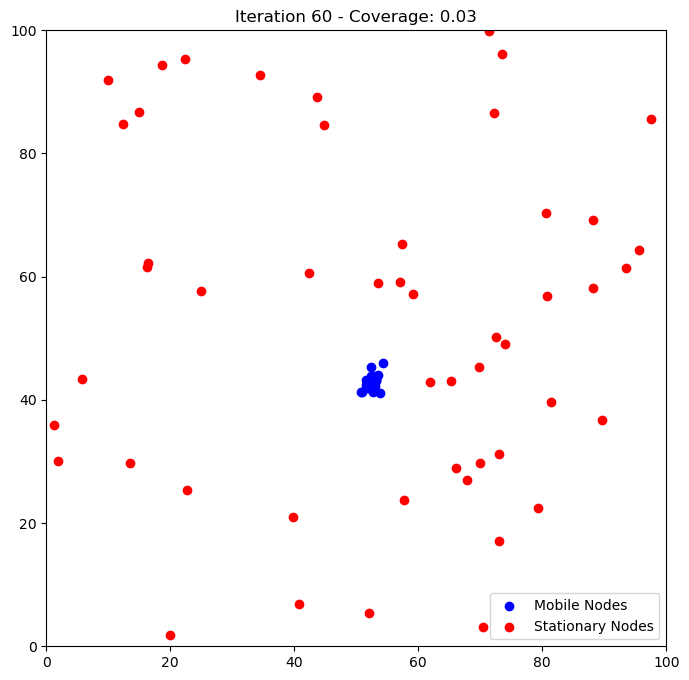

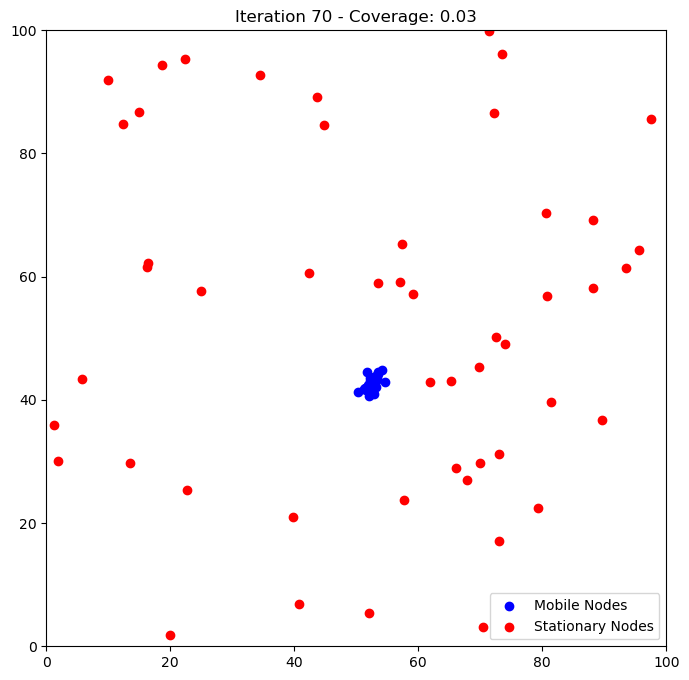

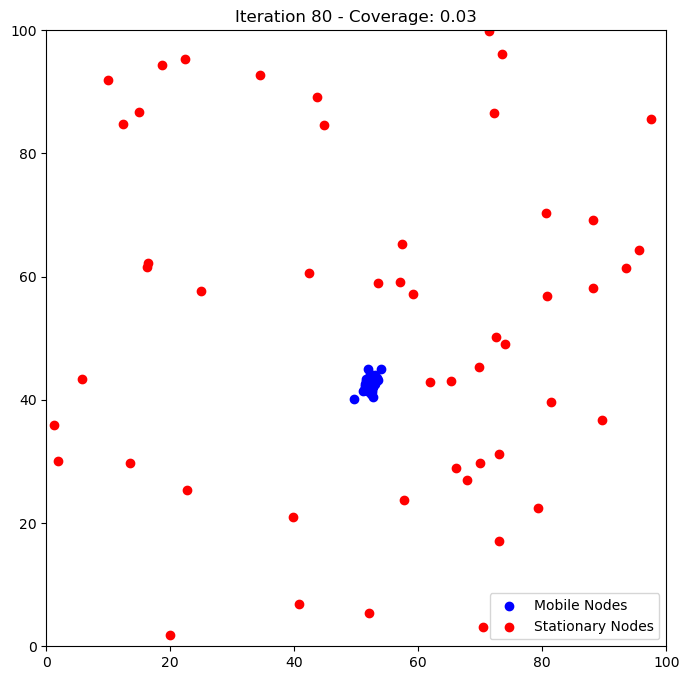

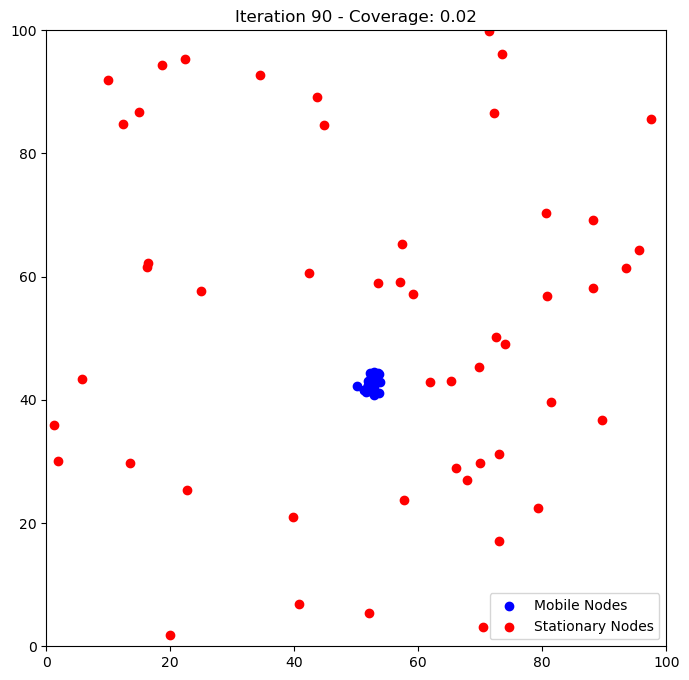

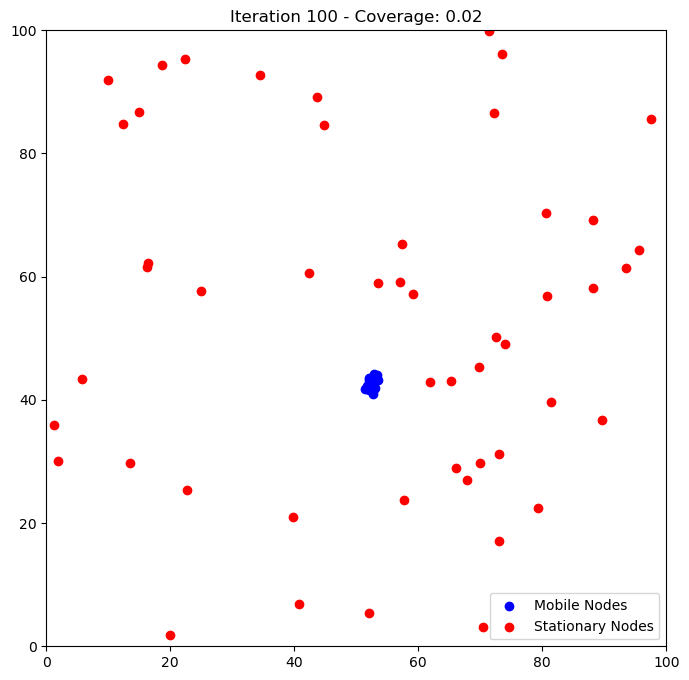

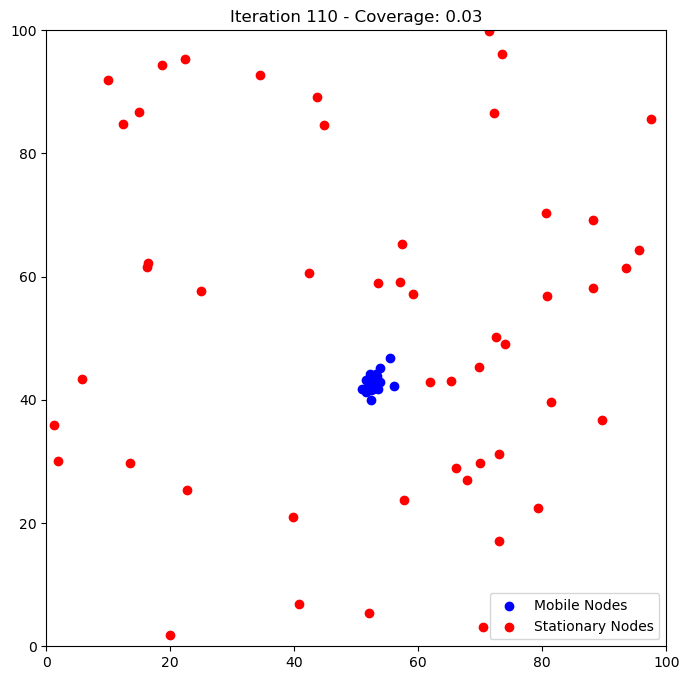

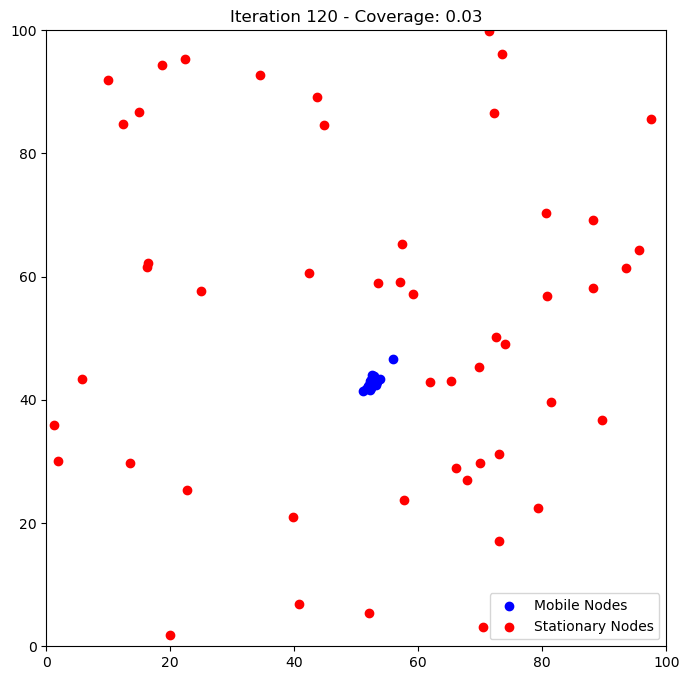

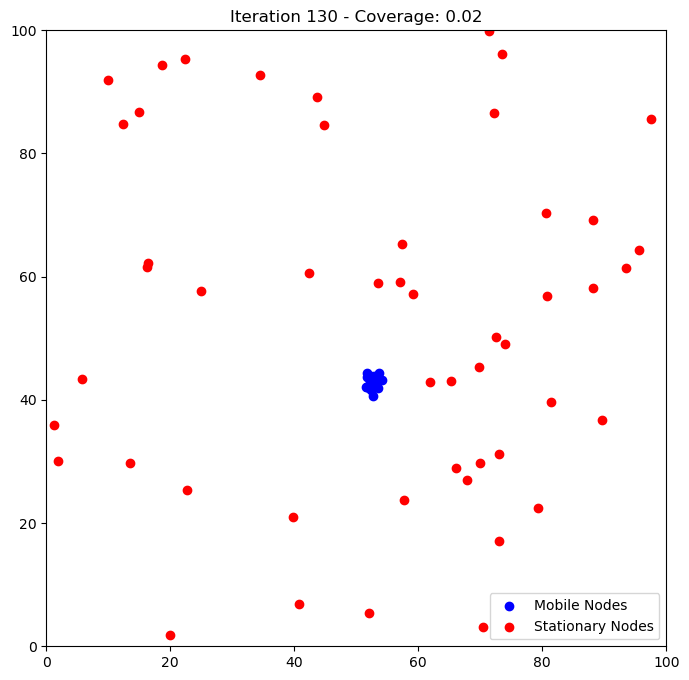

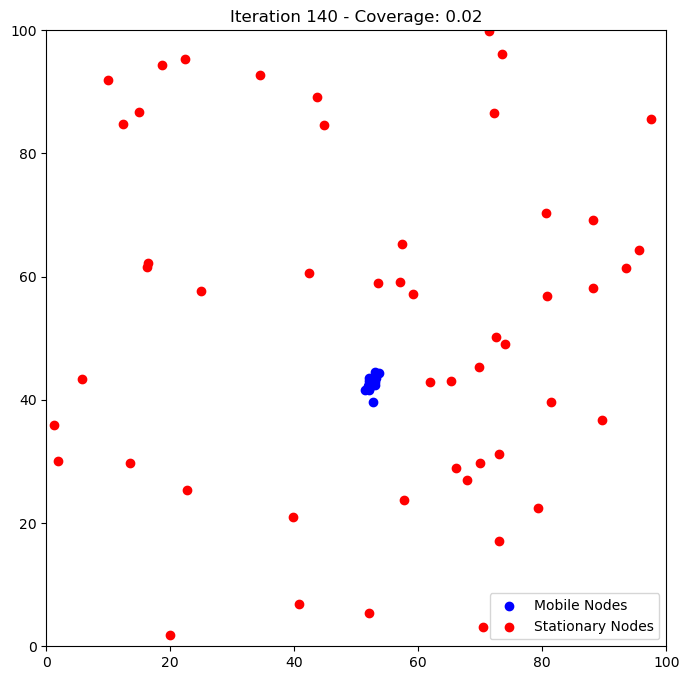

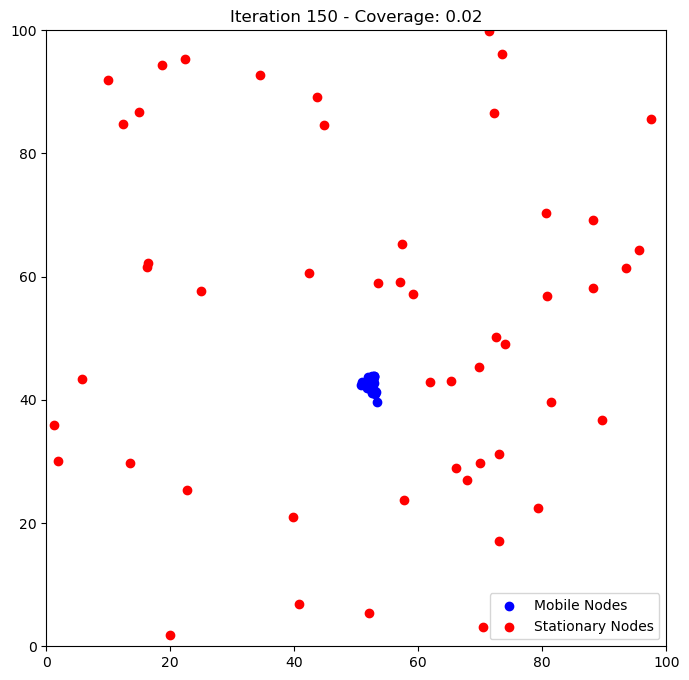

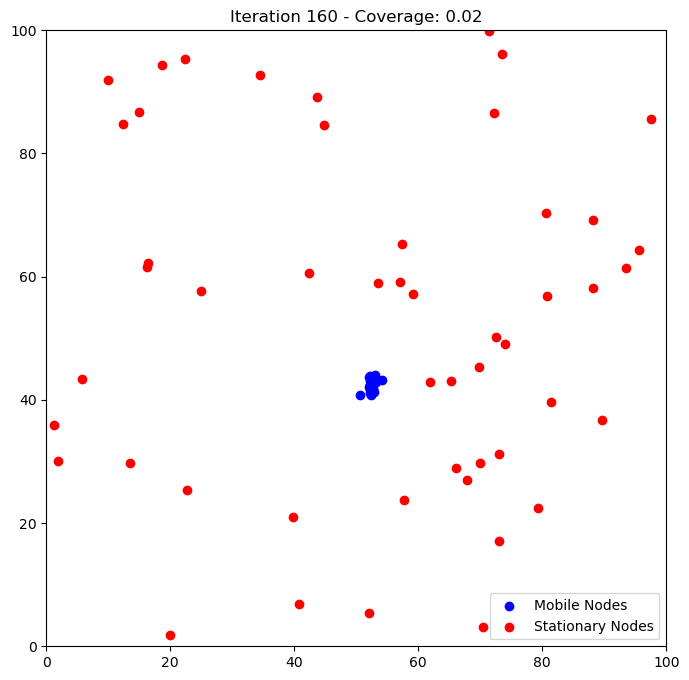

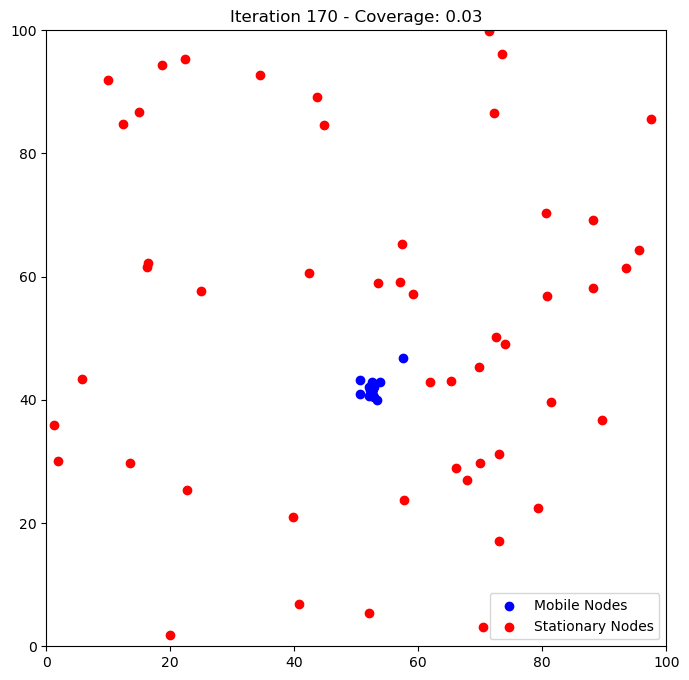

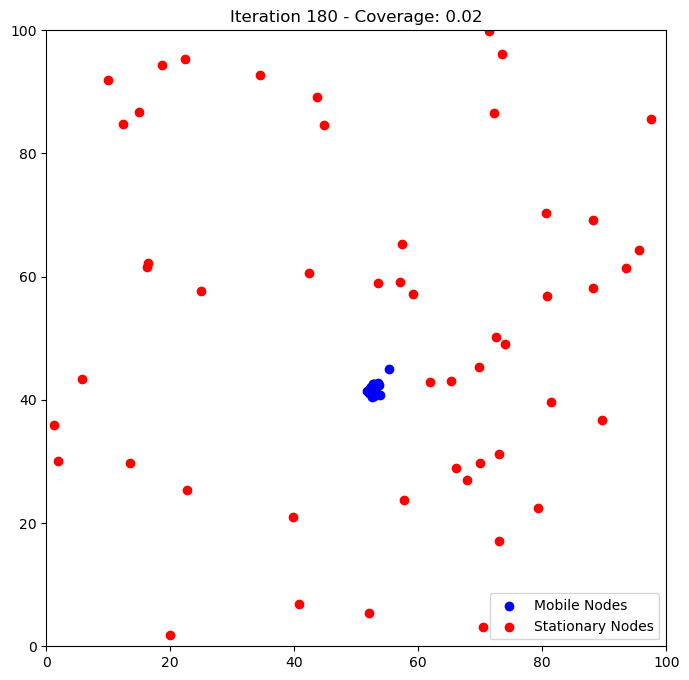

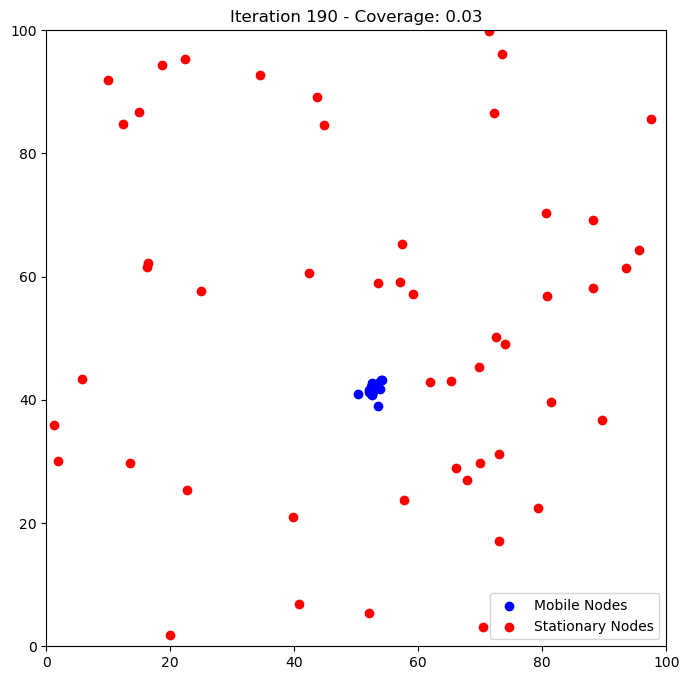

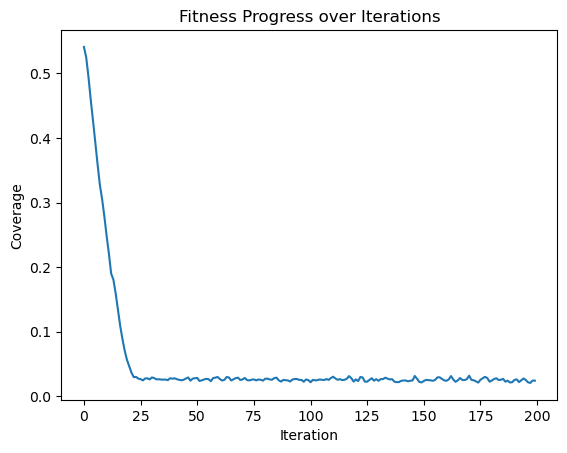

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
NUM_MOBILE_NODES = 50
NUM_STATIONARY_NODES = 50
AREA_SIZE = 100
DETECTION_RADIUS = 7
MAX_ITERATIONS = 200
C1 = 1.5  # cognitive learning factor
C2 = 1.5  # social learning factor
C3 = 0.5  # virtual force factor
W = 0.7  # inertia weight for velocity
MAX_VELOCITY = 2.0
MIN_VELOCITY = -2.0

# Generate random positions for sensor nodes
np.random.seed(0)  # For reproducibility
mobile_nodes = np.random.rand(NUM_MOBILE_NODES, 2) * AREA_SIZE
stationary_nodes = np.random.rand(NUM_STATIONARY_NODES, 2) * AREA_SIZE

# Initialize PSO parameters for mobile nodes
velocities = np.random.rand(NUM_MOBILE_NODES, 2) * MAX_VELOCITY
pbest_positions = np.copy(mobile_nodes)
gbest_position = mobile_nodes[np.random.choice(range(NUM_MOBILE_NODES))]

# Define the virtual force function
def compute_virtual_forces(mobile_nodes, stationary_nodes, detection_radius):
    forces = np.zeros_like(mobile_nodes)
    
    for i, node in enumerate(mobile_nodes):
        force = np.array([0.0, 0.0])
        
        # Repulsive force from stationary nodes
        for stationary_node in stationary_nodes:
            dist = np.linalg.norm(node - stationary_node)
            if dist < detection_radius:
                repulsive_force = (node - stationary_node) / (dist + 1e-6)
                force += repulsive_force
        
        # Attractive force between mobile nodes to maintain coverage
        for j, other_node in enumerate(mobile_nodes):
            if i != j:
                dist = np.linalg.norm(node - other_node)
                if dist > detection_radius:
                    attractive_force = (other_node - node) / (dist + 1e-6)
                    force += attractive_force

        forces[i] = force

    return forces

# Define the fitness function (based on area coverage)
def compute_fitness(nodes, detection_radius):
    grid_size = 1
    grid_points = np.mgrid[0:AREA_SIZE:grid_size, 0:AREA_SIZE:grid_size].reshape(2, -1).T
    covered_points = np.zeros(len(grid_points))

    for node in nodes:
        distances = np.linalg.norm(grid_points - node, axis=1)
        covered_points += distances < detection_radius

    return np.sum(covered_points > 0) / len(grid_points)

# Main VFPSO loop
fitness_progress = []

for iteration in range(MAX_ITERATIONS):
    # Calculate the virtual forces
    forces = compute_virtual_forces(mobile_nodes, stationary_nodes, DETECTION_RADIUS)

    # PSO velocity update with virtual forces
    for i in range(NUM_MOBILE_NODES):
        inertia = W * velocities[i]
        cognitive = C1 * np.random.rand() * (pbest_positions[i] - mobile_nodes[i])
        social = C2 * np.random.rand() * (gbest_position - mobile_nodes[i])
        force_influence = C3 * forces[i]
        
        velocities[i] = inertia + cognitive + social + force_influence

        # Limit velocity to max velocity
        velocities[i] = np.clip(velocities[i], MIN_VELOCITY, MAX_VELOCITY)
        
        # Update positions
        mobile_nodes[i] += velocities[i]

        # Ensure the nodes stay within boundaries
        mobile_nodes[i] = np.clip(mobile_nodes[i], 0, AREA_SIZE)

    # Update personal best (pbest) and global best (gbest) based on fitness
    for i in range(NUM_MOBILE_NODES):
        fitness = compute_fitness(mobile_nodes, DETECTION_RADIUS)
        if fitness > compute_fitness(pbest_positions[i], DETECTION_RADIUS):
            pbest_positions[i] = np.copy(mobile_nodes[i])
    
    if fitness > compute_fitness(gbest_position, DETECTION_RADIUS):
        gbest_position = mobile_nodes[np.argmax([compute_fitness(pos, DETECTION_RADIUS) for pos in mobile_nodes])]

    # Track fitness progress
    fitness_progress.append(fitness)
    
    # Plot the positions and forces (every 10 iterations)
    if iteration % 10 == 0:
        plt.figure(figsize=(8, 8))
        plt.scatter(mobile_nodes[:, 0], mobile_nodes[:, 1], color='b', label='Mobile Nodes')
        plt.scatter(stationary_nodes[:, 0], stationary_nodes[:, 1], color='r', label='Stationary Nodes')
        plt.xlim(0, AREA_SIZE)
        plt.ylim(0, AREA_SIZE)
        plt.title(f'Iteration {iteration} - Coverage: {fitness:.2f}')
        plt.legend()
        plt.show()

# Plot fitness over iterations
plt.plot(fitness_progress)
plt.title('Fitness Progress over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Coverage')
plt.show()
